**Before you start:** Click **File → Save a copy in Drive** so you have your own version of this notebook. If you skip this step, your work will not be saved.

**Turn off AI assistance:** Go to **Settings → AI Assistance** and uncheck everything. AI-generated code is not allowed on assignments in this course.

In [1]:
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.linear_model import LogisticRegression as logistic
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as gs_cv

from sklearn.metrics import roc_auc_score as auc

In [2]:
## load data
universe = pd.read_csv('https://www.dropbox.com/scl/fi/a2tpqpvkdc8n6advvkpt7/universe_lab9.csv?rlkey=839vsc25njgfftzakr34w2070&dl=1')
universe.head()

arrest_events = pd.read_csv('https://www.dropbox.com/scl/fi/n47jt4va049gh2o4bysjm/arrest_events_lab9.csv?rlkey=u66usya2xjgf8gk2acq7afk7m&dl=1')
arrest_events.head()



,arrest_id,person_id,arrest_date,age_at_arrest,sex,race,fta,prediction_felony,y_felony,prediction_nonfelony,y_nonfelony
0,6485569,1121852,2016-10-30,22.145205,M,A,False,0.061631,1.0,0.306006,1.0
1,7371179,709135,2016-03-09,27.893151,M,A,True,0.053235,0.0,0.205538,0.0
2,2881823,1042398,2018-10-10,19.156164,M,A,False,0.260748,1.0,0.469802,1.0
3,2550666,348658,2018-12-12,34.509589,F,A,False,0.048876,0.0,0.219509,0.0
4,4561614,119280,2018-01-03,23.476712,M,A,False,0.227182,1.0,0.513002,1.0


,person_id,arrest_id,arrest_date,charge_no,charge_degree,offense_category
0,1064269,4600673,2017-12-22,4.0,misdemeanor,other
1,1064269,4600673,2017-12-22,1.0,misdemeanor,other
2,1064269,4600673,2017-12-22,2.0,misdemeanor,other
3,1064269,4600673,2017-12-22,3.0,felony,other
4,78714,4283508,2018-02-25,1.0,misdemeanor,other


In [3]:
# Apply the default theme
sns.set_theme()

# Set seaborn figure size
sns.set(rc={'figure.figsize':(6, 4)})


# Bar plots



In [4]:
charge_counts = arrest_events.groupby(['charge_degree']).size().reset_index(name='count')
charge_counts

,charge_degree,count
0,felony,1931
1,misdemeanor,18314


<Axes: xlabel='charge_degree', ylabel='count'>

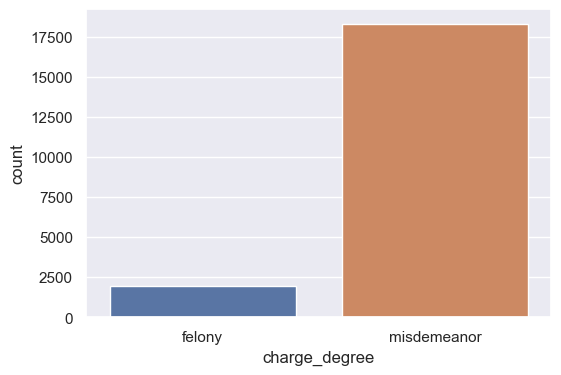

In [5]:
# vertical barplot
sns.barplot(data=charge_counts, 
            x='charge_degree',
            y="count")

<Axes: xlabel='count', ylabel='charge_degree'>

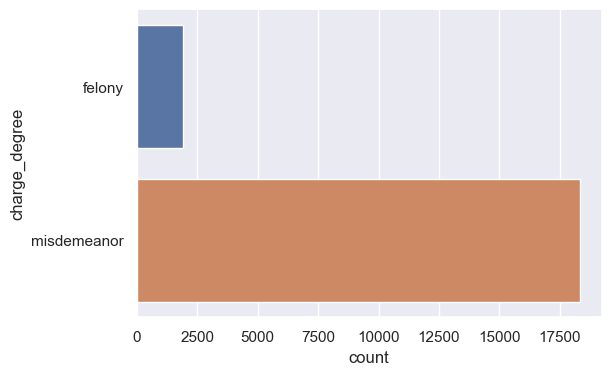

In [6]:
# horizontal barplot 
sns.barplot(data=charge_counts, 
            y="charge_degree", 
            x='count', 
            orient='h')

### Using hue

In [7]:
charge_counts_by_offense = arrest_events.groupby(
    ['charge_degree', 'offense_category']
).size().reset_index(name='count')

charge_counts_by_offense

,charge_degree,offense_category,count
0,felony,drug,651
1,felony,other,223
2,felony,property,904
3,felony,violent,153
4,misdemeanor,drug,5663
5,misdemeanor,other,6164
6,misdemeanor,property,4346
7,misdemeanor,violent,2141


<Axes: xlabel='charge_degree', ylabel='count'>

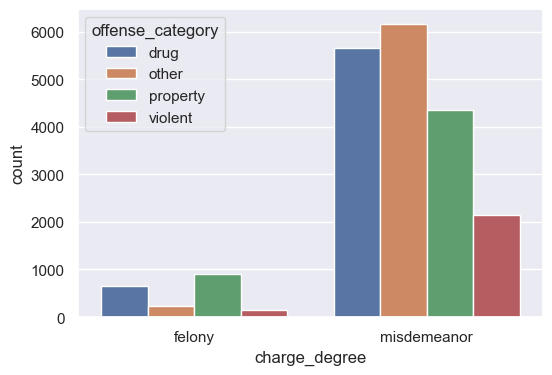

In [8]:
# vertical barplot with hue
sns.barplot(data=charge_counts_by_offense, 
            x='charge_degree',
            y="count",
            hue='offense_category')

## Category plots

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


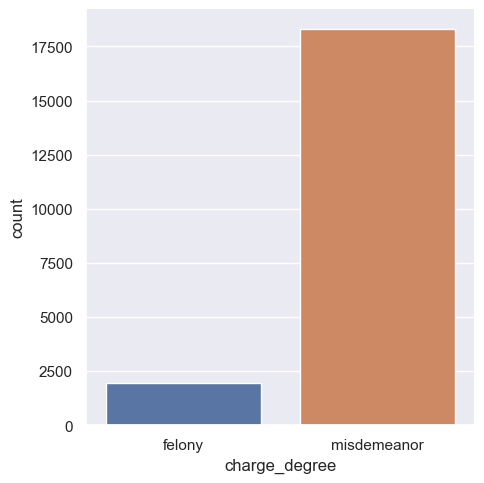

In [9]:
sns.catplot(data=charge_counts,
            x='charge_degree',
            y='count', 
            kind='bar')

## Flexible category plot

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


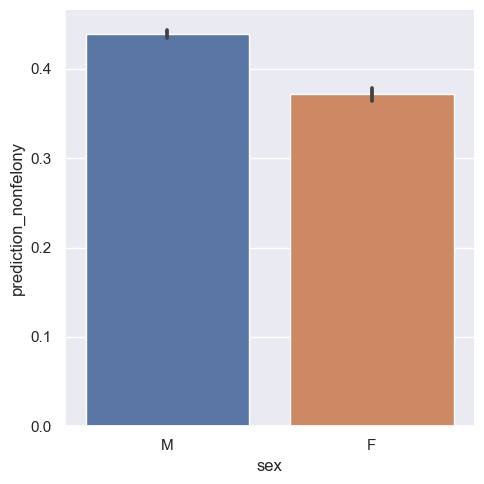

In [10]:
sns.catplot(data=universe, 
            x='sex',
            y='prediction_nonfelony', 
            kind='bar')

# Histograms

<Axes: xlabel='prediction_nonfelony', ylabel='Count'>

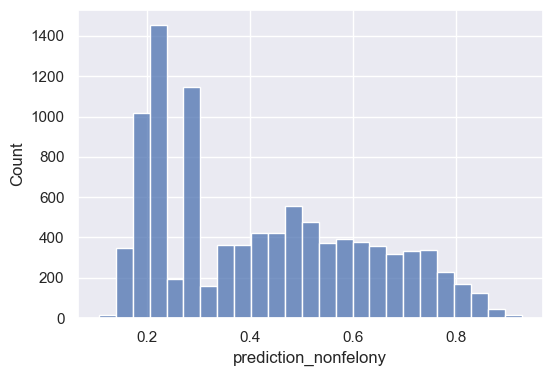

In [11]:
sns.histplot(data=universe, 
             x='prediction_nonfelony')

<Axes: xlabel='prediction_nonfelony', ylabel='Count'>

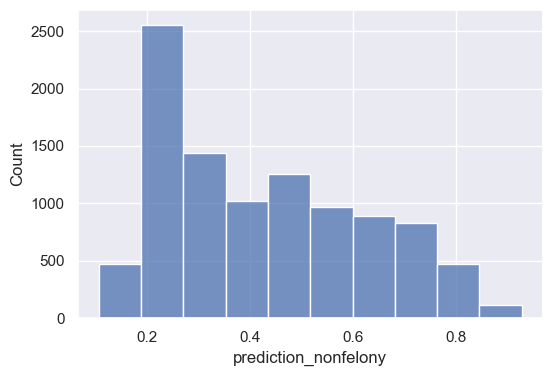

In [12]:
sns.histplot(data=universe, 
             x='prediction_nonfelony',
             bins=10)

<Axes: xlabel='prediction_nonfelony', ylabel='Probability'>

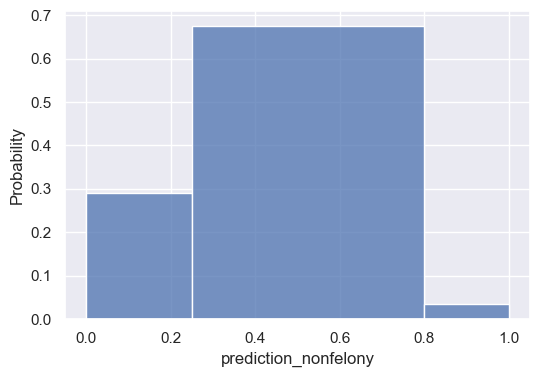

In [13]:
sns.histplot(data=universe, 
             x='prediction_nonfelony', 
             stat='probability',
             bins=[0, .25, .8, 1])

# Scatterplot

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


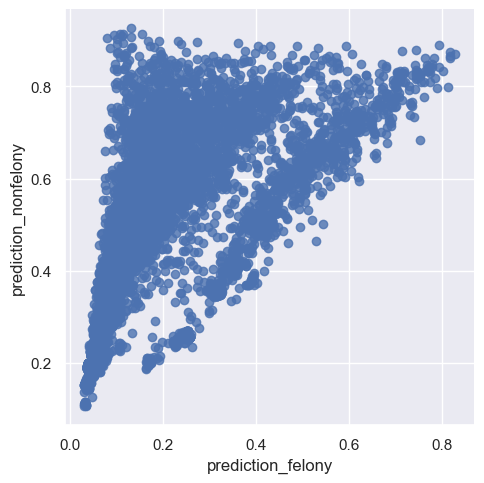

In [14]:
sns.lmplot(data=universe, 
           x='prediction_felony', 
           y='prediction_nonfelony',
           fit_reg=False)

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


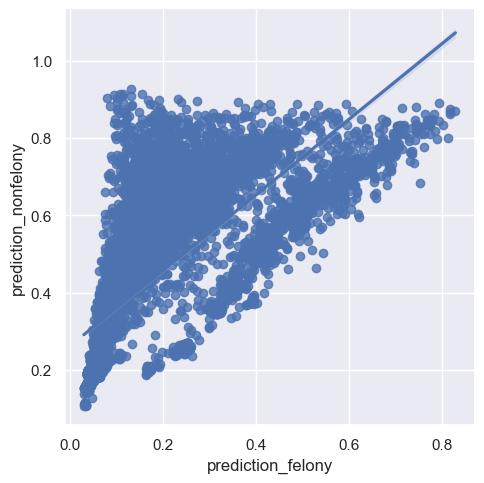

In [15]:
sns.lmplot(data=universe, 
           x='prediction_felony', 
           y='prediction_nonfelony')

## Plotting a 45-degree line

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


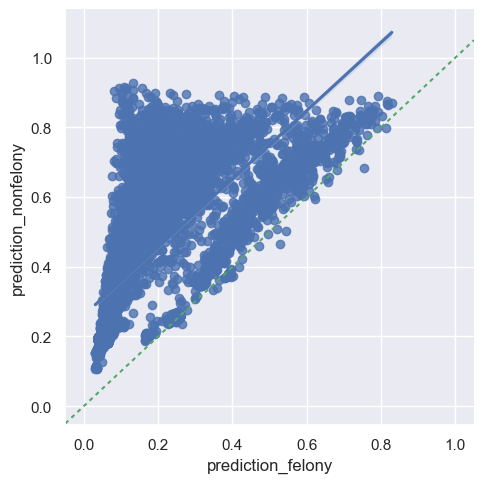

In [16]:
sp = sns.lmplot(data=universe, 
           x='prediction_felony', 
           y='prediction_nonfelony')
sp.ax.axline(xy1=(0, 0), 
             xy2=(1, 1),
             color="g",
             dashes=(2, 2))

### Hueing by race

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


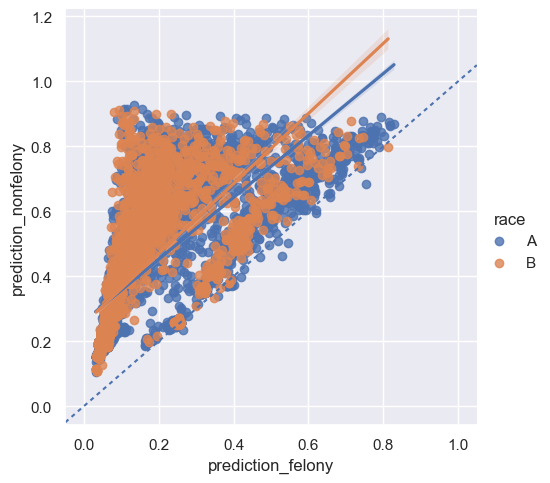

In [17]:
sp = sns.lmplot(data=universe, 
                x='prediction_felony', 
                y='prediction_nonfelony', 
                hue='race')
sp.ax.axline(xy1=(0, 0), xy2=(1, 1), color="b", dashes=(2, 2))

### Faceting 

C:\Users\zjelv\anaconda3\envs\inst414\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


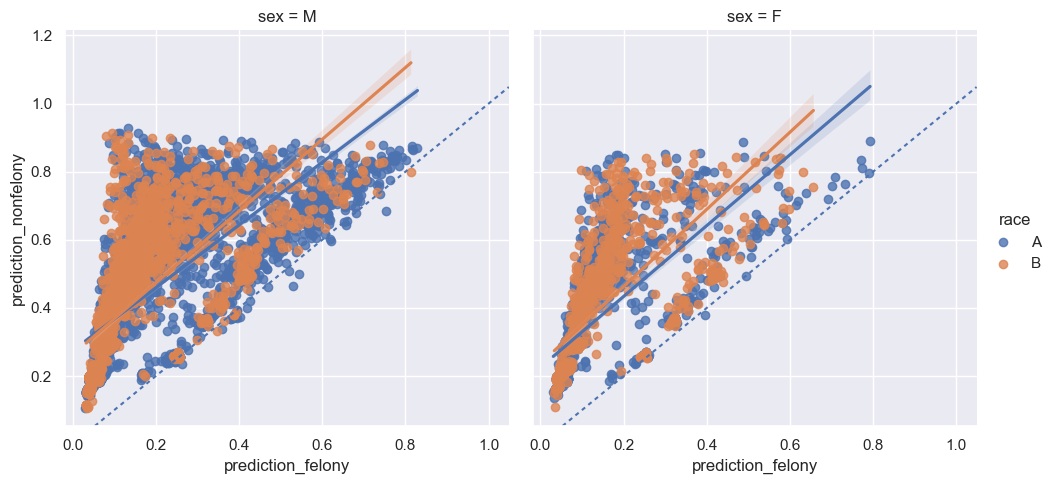

In [18]:
sp = sns.lmplot(data=universe, 
                x='prediction_felony', 
                y='prediction_nonfelony', 
                hue='race', 
                col='sex')
sp.axes[0][0].axline(xy1=(1, 1), slope=1, color="b", dashes=(2, 2))
sp.axes[0][1].axline(xy1=(1, 1), slope=1, color="b", dashes=(2, 2))

# Lab Task

1. Using the universe data frame, create a bar plot for the fta column.

2. Now hue the previous barplot by sex


3. Plot a histogram of age_at_arrest

4. Plot the same histogram, but create bins that represent the following age groups 
 - 18 to 21
 - 21 to 30
 - 30 to 40
 - 40 to 100 

3. The charge_no column in arrest events tells us the charge degree and offense category for each arrest charge. An arrest can have multiple charges. We want to know if an arrest had at least one felony charge.

Use groupby and apply with lambda to create a new dataframe called `felony_charge` that has columns: 
['arrest_id', 'has_felony_charge']

Hint 1: One way to do this is that in the lambda function, check to see if a charge_degree is felony, sum these up, and then check if the sum is greater than zero. 

Hint 2: Another way to do thisis that in the lambda function, use the `any` function when checking to see if any of the charges in the arrest are a felony

4. Merge felony_charge with universe 

5. Create a catplot where the categories are charge type and the y-axis is the prediction for felony rearrest. Set kind='bar'.

6. Now repeat but have the y-axis be prediction for nonfelony rearrest

What might explain the difference between the plots?

7. Repeat the plot from 5, but hue by whether the person actually got rearrested for a felony crime

What does it mean that prediction for arrestees with a current felony charge, but who did not get rearrested for a felony crime have a higher predicted probability than arrestees with a current misdemeanor charge, but who did get rearrested for a felony crime?

8. Using lmplot, create a scatter plot where the x-axis is the prediction for felony and the y-axis the is prediction for a nonfelony, and hue this by whether the current charge is a felony. 

What can you say about the group of dots on the right side of the plot?

9. Create a scatterplot where the x-axis is prediction for felony rearrest and the y-axis is whether someone was actually rearrested.

Would you say based off of this plot if the model is calibrated or not?